<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH17_07_Sentence_Bert(SBERT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. BERT의 문장 임베딩
--------------------

BERT로부터 문장벡터를 얻는 방법은 여러가지 방법이 존재하지만, 여기서는 총 세가지 방법에 대해 설명함


만약 사전 학습된 BERT에 'I love you'라는 문장이 입력된다고 하였을때, 이 문장에 대한 벡터를 얻는 첫번째 방법은 \[CLS] 토큰의 출력벡터를 문장벡터로 간주하는 것임

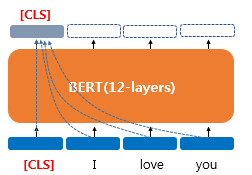

앞서 BERT로 텍스트 분류 문제를 풀때, \[CLS] 토큰의 출력벡터를 출력층의 입력으로 사용했던 점을 상기해보자. 

이는 \[CLS] 토큰이 입력된 문장에 대한 총체적 표현이라고 간주하고 있기 때문임. 즉, \[CLS] 토큰자체를 입력문장의 벡터로 간주할 수 있음

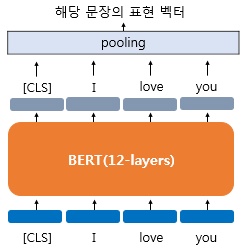

문장벡터를 얻는 두번째 방법은 \[CLS] 토큰만을 사용하는 것이 아니라, BERT의 모든 출력벡터들을 평균내는 것임

BERT의 각 단어에 대한 출력 벡터들에 대해 평균을 내고 이를 문장벡터로 볼 수 있음. 위의 그림에서 **출력벡터들의 평균을 'pooling'이라고 표현함**

그런데 풀링에는 평균 풀링만 있는 것이 아니라, 합성곱 신경망을 다룰 때 설명했던 맥스풀링도 존재함

세번째 방법은 BERT의 각 단어의 출력벡터들에 대해 평균 풀링 대신 맥스 풀링을 진행한 벡터를 얻는 것임


정리하면 사전 학습된 BERT로부터 문장벡터를 얻는 방법은 다음과 같이 세가지 방법이 있음
* BERT의 [CLS] 토큰의 출력벡터를 문장벡터로 간주
* BERT의 모든 단어의 출력벡터에 대해 평균 풀링을 수행한 벡터를 문장벡터로 간주
* BERT의 모든 단어의 출력벡터에 대해 맥스풀링을 수행한 벡터를 문장벡터로 간주

이때, 평균풀링을 하느냐와 맥스풀링을 하느냐에 따라 해당 문장벡터가 가지는 의미는 다소 다른데, **평균 풀링을 얻은 문장벡터의 경우에는 모든 단어의 의미를 반영하는 쪽에 가깝다면, 맥스풀링을 얻은 문장벡터의 경우에는 중요한 단어의 의미를 반영하는 쪽에 가까움**


### 2. SBERT(센텐스버트, Sentence-BERT)
-----------------------
SBERT는 기본적으로 BERT의 문장임베딩 성능을 우수하게 개선시킨 모델임

SBERT는 BERT의 상기의 문장임베딩을 응용하여 BERT를 파인튜닝함


#### 1) 문장쌍 분류 태스크로 파인 튜닝
SBERT를 학습하는 첫번째 방법은 문장쌍 분류 태스크임. 대표적으로는 NLI(Natural Language Inferencing) 문제를 푸는 것임. NLI는 두개의 문장이 주어지면 수반(entailment) 관계인지, 모순(contradiction) 관계인지, 중립(neutral) 관계인지 맞추는 문제임

SBERT는 NLI 데이터를 학습하기 위해 다음과 같은 구조를 가짐

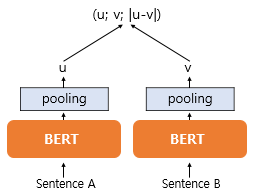

우선 문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 앞서 BERT의 문장 임베딩을 얻기 위한 방식인 평균풀링 또는 맥스풀링을 통해 각각에 대한 문장임베딩 벡터를 얻음


여기서는 이를 각각 $u, v$라고 하자. 그리고 나서 이 벡터들의 차이를 구하고, 도출된 세개 벡터를 연결(concatenation)함. 아래의 세미콜론(;)을 연결기호로 연결된 벡터의 수식은 다음과 같음

$$h = (u; v; |u-v|)$$

만약 BERT의 문장임베딩 벡터의 차원이 $n$이라면 세개의 벡터를 연결한 벡터 $h$의 차원은 $3n$이 됨

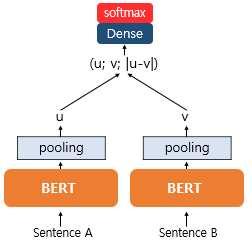

그리고 이 벡터를 출력층으로 보내 다중클래스 분류문제를 풀도록 함. 즉, 분류하고자 하는 클래스 개수가 $k$라면 가중치 행렬 $3n$ x $k$의 크기를 가지는 행렬 $W_y$를 곱한 후에 소프트맥스 함수를 통과시킨다고도 볼 수 있음

$$o = softmax(W_{y}h)$$

이제 실제값에 해당하는 레이블로부터 오차를 줄이는 방식으로 학습시킴


#### 2) 문장쌍 회귀 태스크로 파인 튜닝
SBERT를 학습하는 두번째 방법은 문장쌍으로 회귀문제를 푸는 것으로 대표적으로 STS(Semantic Textual Similarity) 문제를 푸는 경우임. STS란 두개의 문장으로부터 의미적 유사성을 구하는 문제임. 즉, 두 문장의 유사도를 구하는 것임




**참고) 한국어 버전의 STS 데이터셋인 KorSTS 데이터셋도 있으므로 아래 링크를 참고!!**

링크 : https://github.com/kakaobrain/KorNLUDatasets



SBERT는 STS 데이터를 학습하기 위해 다음과 같은 구조를 가짐

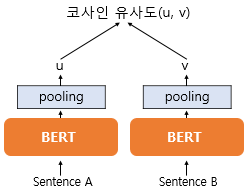

문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 평균 풀링 또는 맥스 풀링을 통해 각각에 대한 문장 임베딩 벡터를 얻음

이는 각각 u와 v라고 하였을때 **두 벡터의 코사인 유사도를 구함**. 이는 **해당 유사도와 레이블 유사도와의 평균 제곱 오차(Mean Squarerd Error, MSE)를 최소화하는 방식으로 학습함**

코사인 유사도 값의 범위는 -1과 1사이이므로 위 데이터와 같이 레이블 스코어의 범위가 0-5점이라면 학습 전 해당 레이블의 값들을 5로 나누어 값의 범위를 줄인후 학습할 수 있음

선택에 따라 1) 문장쌍 분류 태스크로만 파인튜닝할 수 있고, 2) 문장쌍 회귀태스크로만 파인튜닝 할 수도 있음.

1)을 학습한 후에 2)를 학습하는 전략도 세울 수 있음